In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/NNDL/sentiment140 dataset.csv', encoding='latin1')


In [ ]:
data.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [ ]:
# Display the first few rows of the dataframe
print(data.head())

# Check for missing values
print(data.isnull().sum())

   target         ids                          date      flag           user  \
0       0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY  scotthamilton   
1       0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY       mattycus   
2       0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY        ElleCTF   
3       0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY         Karoli   
4       0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY       joy_wolf   

                                                text  
0  is upset that he can't update his Facebook by ...  
1  @Kenichan I dived many times for the ball. Man...  
2    my whole body feels itchy and like its on fire   
3  @nationwideclass no, it's not behaving at all....  
4                      @Kwesidei not the whole crew   
target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64


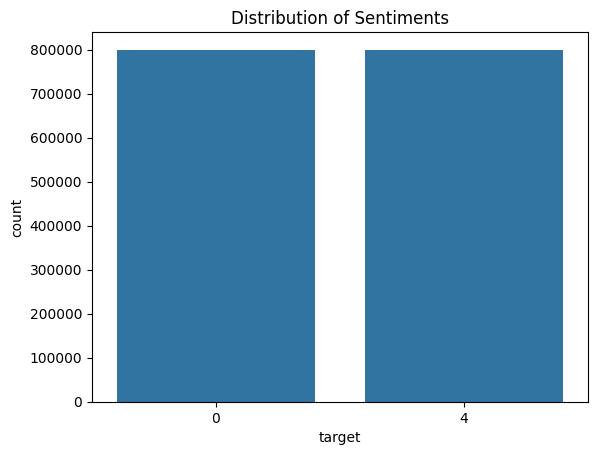

In [ ]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Sentiments')
plt.show()


In [ ]:
X = data['text']
y = data['target']

# Convert target values to binary (0 = negative, 1 = positive)
y = y.apply(lambda x: 1 if x == 4 else 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text data
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


In [ ]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vect)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.79      0.77    239361
           1       0.78      0.73      0.75    240639

    accuracy                           0.76    480000
   macro avg       0.76      0.76      0.76    480000
weighted avg       0.76      0.76      0.76    480000

Confusion Matrix:
[[189907  49454]
 [ 65188 175451]]
